In [8]:
from qiskit import QuantumCircuit
import numpy as np

In [9]:
def dj_function(num_qubits):
    qc = QuantumCircuit(num_qubits + 1)
    if np.random.randint(0, 2):
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        return qc
    
    on_states = np.random.choice(
    range(2**num_qubits),
    2**num_qubits // 2,
    replace=False)

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc
    
    for state in on_states:
        qc.barrier()
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

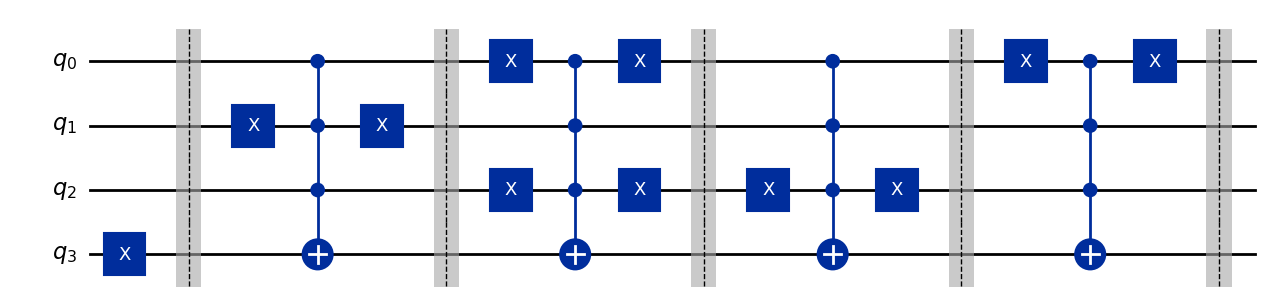

In [10]:
display(dj_function(3).draw(output="mpl"))

In [11]:
def compile_circuit(function: QuantumCircuit):
    n = function.num_qubits - 1
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    qc.h(range(n+1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [12]:
from qiskit_aer import AerSimulator

In [13]:
def dj_algo(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

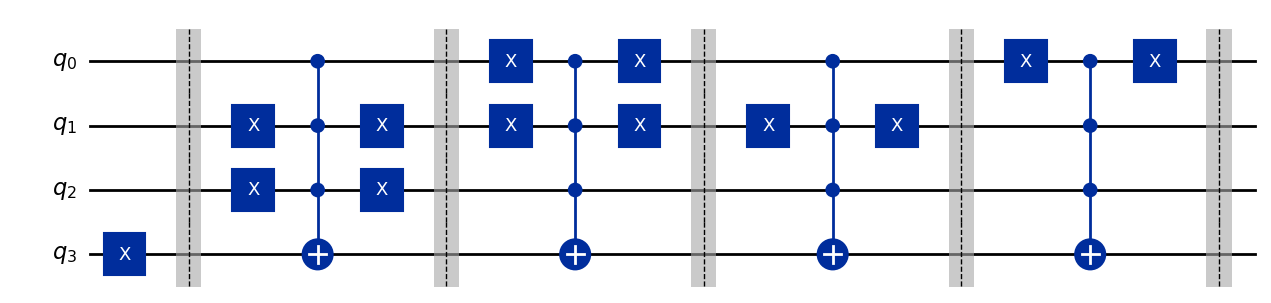

'balanced'

In [14]:
f = dj_function(3)
display(f.draw(output='mpl'))
display(dj_algo(f))